# AMAZON DATA ANALYSIS:

Read The Data :

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

In [3]:
import sqlite3

In [4]:
con = sqlite3.connect(r'C:\Users\home\Downloads\Sql data/database.sqlite')

In [5]:
type(con)

sqlite3.Connection

In [6]:
#reading data from SQLite Database
df = pd.read_sql_query("SELECT * FROM REVIEWS", con)

In [7]:
df.shape

(568454, 10)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# DATA PREPARING / CLEANING

AFTER UNDERSTANDING THE DATA THROUGH SHAPE,INFO AND TYPE . THE NEXT STEP IS DATA PREPARATION

In [11]:
#Prep step 1 : Finding columns that have wrong values
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [12]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [13]:
df_valid = df[df['HelpfulnessNumerator'] <+ df['HelpfulnessDenominator']]

In [14]:
df_valid.shape

(115091, 10)

In [15]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [16]:
#Removing duplicate columns
df_valid.duplicated([ 'UserId', 'ProfileName', 'Time', 'Text'])

14        False
15        False
26        False
27        False
31        False
          ...  
568405    False
568413     True
568417    False
568435    False
568439    False
Length: 115091, dtype: bool

In [17]:
df_valid[df_valid.duplicated([ 'UserId', 'ProfileName', 'Time', 'Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2946,2947,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,0,1,1,1310774400,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...
2947,2948,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,0,2,1,1291420800,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ..."
4641,4642,B0002NYO9I,A376TWN7I4HMZ8,helios,0,1,5,1324252800,Exaclty what i ordered,"Again, exactly what I ordered. No fuss, no mus..."
4642,4643,B0002NYO9I,A29CO2S0VTT0C5,S. Choo,0,3,3,1326758400,get a new package,"Berries are find, but the package is bad. Unab..."
9021,9022,B006N3IG4K,A3504B9G5BJJM8,"Jeremy Agran ""iamreality""",3,4,5,1331596800,IT IS NOT DECAF PEOPLE!!!,I'm amazed how many are being so easily fooled...
...,...,...,...,...,...,...,...,...,...,...
568354,568355,B003O5Q3KE,A2Q833MV8UEM37,Josh Crick,0,2,1,1286841600,My Dog HATED these treats,Went into the dumpster the very first night. M...
568388,568389,B001EQ5O6Y,A3JDX65QJO3Q2F,Don't believe it just because someone told yo...,5,6,4,1187395200,Awesome product,I have used agave for many things and find tha...
568402,568403,B001EQ5O6Y,A1A3H22VVZYUKW,msfreixy,1,3,1,1187049600,alternative sweetner,"I was disappointed in this product, as I had r..."
568403,568404,B001EQ5O6Y,A2891E3BMAKGYN,"PCNiles ""reader/writer""",0,6,2,1264118400,"Deceptive Term = ""Sticks""","When I ordered these, based on the description..."


In [18]:
data = df_valid.drop_duplicates(subset=[ 'UserId', 'ProfileName', 'Time', 'Text'])

In [19]:
data.shape

(78220, 10)

In [20]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

AFTER THE DATA TYPE CHECK WE CAN SEE TIME IS IN INT64 FORMAT WHICH HAS TO BE IN DATE TIME FORMAT. LET'S CORRECT IT.

In [21]:
#Prep step 2: Correcting data type formats
data['Time']

14        1268352000
15        1262044800
26        1332633600
27        1331856000
31        1288310400
             ...    
568384    1255219200
568405    1274918400
568417    1257897600
568435    1285718400
568439    1280102400
Name: Time, Length: 78220, dtype: int64

In [22]:
pd.to_datetime(data['Time'])

14       1970-01-01 00:00:01.268352000
15       1970-01-01 00:00:01.262044800
26       1970-01-01 00:00:01.332633600
27       1970-01-01 00:00:01.331856000
31       1970-01-01 00:00:01.288310400
                      ...             
568384   1970-01-01 00:00:01.255219200
568405   1970-01-01 00:00:01.274918400
568417   1970-01-01 00:00:01.257897600
568435   1970-01-01 00:00:01.285718400
568439   1970-01-01 00:00:01.280102400
Name: Time, Length: 78220, dtype: datetime64[ns]

In [23]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')

In [24]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# ANALYSIS

HOW AMAZON RECOMMENDS PRODUCT?

In [25]:
data['ProfileName'].unique()

array(['Lynrie "Oh HELL no"', 'Brian A. Lee', 'lady21', ...,
       'William M. Jacobs', 'carlyowu', 'Donald M. Cook'], dtype=object)

In [26]:
data['ProfileName'].nunique()

56846

In [27]:
data['UserId'].nunique()

62052

In [28]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count', 'Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId', ascending=False)

In [29]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
A281NPSIMI1C2R,70,70,4.800000,70
A2A1XYSB692L6J,53,53,3.698113,53
A1LZJZIHUPLDV4,51,51,4.960784,51
A29313797NGT9L,45,45,3.311111,45
A1YUL9PCJR3JTY,44,44,4.590909,44
...,...,...,...,...
A2BUMO4IARNSL,1,1,1.000000,1
A2BUPVAQ8NN7EU,1,1,5.000000,1
A2BUR03REASIKQ,1,1,1.000000,1


In [30]:
recommend_df.columns = ['Number_of_summaries', 'num_text', 'avg_score', 'Number_of_products']

In [31]:
recommend_df

,Number_of_summaries,num_text,avg_score,Number_of_products
UserId,,,,
A281NPSIMI1C2R,70,70,4.800000,70
A2A1XYSB692L6J,53,53,3.698113,53
A1LZJZIHUPLDV4,51,51,4.960784,51
A29313797NGT9L,45,45,3.311111,45
A1YUL9PCJR3JTY,44,44,4.590909,44
...,...,...,...,...
A2BUMO4IARNSL,1,1,1.000000,1
A2BUPVAQ8NN7EU,1,1,5.000000,1
A2BUR03REASIKQ,1,1,1.000000,1


In [32]:
recommend_df.index[0:10]

Index(['A281NPSIMI1C2R', 'A2A1XYSB692L6J', 'A1LZJZIHUPLDV4', 'A29313797NGT9L',
       'A1YUL9PCJR3JTY', 'A2R6RA8FRBS608', 'A3D6TFYRMIV3ZL', 'A3F3B1JPACN215',
       'AXO4PQU0XG3TG', 'A1WX42M589VAMQ'],
      dtype='object', name='UserId')

In [33]:
#FINDING OUT TOP 10 PEOPLE TO RECOMMEND PRODUCTS
recommend_df['Number_of_products'][0:10]

UserId
A281NPSIMI1C2R    70
A2A1XYSB692L6J    53
A1LZJZIHUPLDV4    51
A29313797NGT9L    45
A1YUL9PCJR3JTY    44
A2R6RA8FRBS608    43
A3D6TFYRMIV3ZL    39
A3F3B1JPACN215    38
AXO4PQU0XG3TG     37
A1WX42M589VAMQ    31
Name: Number_of_products, dtype: int64

In [34]:
recommend_df['Number_of_products'][0:10].values

array([70, 53, 51, 45, 44, 43, 39, 38, 37, 31], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

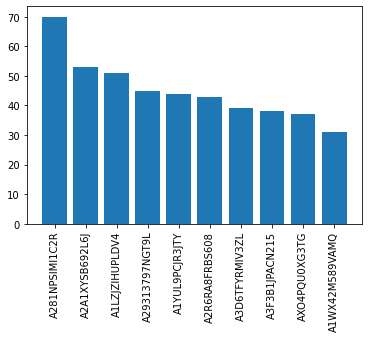

In [35]:
#CREATING A BAR CHART
plt.bar(recommend_df.index[0:10] , recommend_df['Number_of_products'][0:10].values)
plt.xticks(rotation='vertical')

FINDING PRODUCTS WITH GOOD NUMBER OF REVIEWS 

In [36]:
len(data['ProductId'].unique())

22602

In [37]:
prod_count = data['ProductId'].value_counts().to_frame()

In [38]:
prod_count

,ProductId
B002IEZJMA,240
B007I7Z3Z0,229
B006Q820X0,203
B005ZBZLT4,200
B004JRMG98,191
...,...
B000M8O0ME,1
B001ASH39W,1
B000IXWDKE,1
B0028H3IE8,1


In [39]:
prod_count['ProductId']>190

B002IEZJMA     True
B007I7Z3Z0     True
B006Q820X0     True
B005ZBZLT4     True
B004JRMG98     True
              ...  
B000M8O0ME    False
B001ASH39W    False
B000IXWDKE    False
B0028H3IE8    False
B000NY4SAG    False
Name: ProductId, Length: 22602, dtype: bool

In [40]:
prod_count[prod_count['ProductId']>190]

,ProductId
B002IEZJMA,240
B007I7Z3Z0,229
B006Q820X0,203
B005ZBZLT4,200
B004JRMG98,191
B006MONQMC,191


In [41]:
freq_prod_ids = prod_count[prod_count['ProductId']>190].index

In [42]:
freq_prod_ids 

Index(['B002IEZJMA', 'B007I7Z3Z0', 'B006Q820X0', 'B005ZBZLT4', 'B004JRMG98',
       'B006MONQMC'],
      dtype='object')

UNDERSTANDING BEHAVIOURS OF USERS

In [43]:
data['ProductId'].isin(freq_prod_ids)

14        False
15        False
26        False
27        False
31        False
          ...  
568384    False
568405    False
568417    False
568435    False
568439    False
Name: ProductId, Length: 78220, dtype: bool

In [44]:
#CREATING A DATAFRAME THAT HAS FREQUENT PRODUCTORDERS
freq_prod_df = data[data['ProductId'].isin(freq_prod_ids)]

In [45]:
freq_prod_df 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
63419,63420,B002IEZJMA,A3A8FMW6BDJ166,janjanmom,2,3,1,2012-07-20,ONLY if you LOVE STRONG COFFEE!!,This coffee drink is so strong that it dried u...
63420,63421,B002IEZJMA,A10PEXB6XAQ5XF,Michael Gallagher,2,3,3,2012-06-26,It Was Just OK and Not Very Special,"I really like coffee, but overall I would rate..."
63482,63483,B002IEZJMA,A2MG95DI29NJTJ,Seth Eliot,7,11,1,2012-06-30,The worst thing I've ever tasted,1. I am purposely writing this review blind of...
63483,63484,B002IEZJMA,A14OXMSONXSZIR,Steven Y,5,8,5,2012-01-30,My Preferred Caffeine Kick,This is the best coffee-based energy drink. It...
63484,63485,B002IEZJMA,A303SURN4JXPS8,Maggie,5,8,4,2011-05-18,Very smooth taste,Very flavor of this canned expresso. Better th...
...,...,...,...,...,...,...,...,...,...,...
543909,543910,B006MONQMC,AY46DEOJJYFTW,Kerry O. Burns,0,3,1,2012-04-05,"nice idea, bad taste...",It must have sounded like a winner on the draw...
543910,543911,B006MONQMC,A1UMSB7LAW0RIR,"Writer of Books - Mage - Mom to Two ""Writer, ...",0,3,1,2012-03-31,Just a mess all the way around.,I love energy drinks. This one is kind of a me...
543911,543912,B006MONQMC,A305XM71TF83CY,Keleigh Crigler Hadley,0,3,1,2012-03-30,Too confusing,"""A squeeze""? How do I know how much I should s..."
543912,543913,B006MONQMC,A3T4OHEAHOJ700,B. Colonna,0,3,1,2012-03-30,More Like Vitamin Squeeze Enemy,I had read a few of the reviews on Vitamin Squ...


<AxesSubplot:xlabel='count', ylabel='ProductId'>

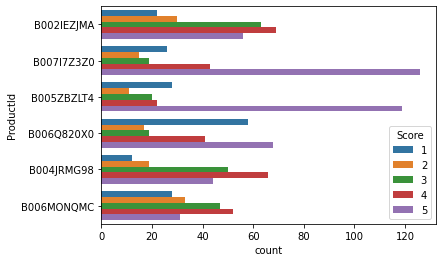

In [46]:
sns.countplot(y = 'ProductId' , data = freq_prod_df , hue= 'Score')

In [47]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

ANALYSING FREQUENT USERS

In [48]:
x = data['UserId'].value_counts()

In [49]:
x

A281NPSIMI1C2R    70
A2A1XYSB692L6J    53
A1LZJZIHUPLDV4    51
A29313797NGT9L    45
A1YUL9PCJR3JTY    44
                  ..
AIKK0O36ZIWM0      1
A2WN4WXBH2B8AN     1
AVUF9YJWWNDHL      1
A12B2H42QXCG3G     1
A34GDV49ZZQKXG     1
Name: UserId, Length: 62052, dtype: int64

In [50]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,2009-12-29,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,2012-03-16,Great Bargain for the Price,I was so glad Amazon carried these batteries. ...
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,5,2010-10-29,THIS IS MY TASTE...,"This offer is a great price and a great taste,..."


In [51]:
data['viewer_type'] = data['UserId'].apply(lambda user : "Frequent" if x[user] > 20 else "Not Frequent")

In [52]:
data['viewer_type'].unique()

array(['Frequent', 'Not Frequent'], dtype=object)

In [53]:
data['viewer_type']=="Not Frequent"

14        False
15         True
26         True
27         True
31         True
          ...  
568384     True
568405     True
568417     True
568435     True
568439     True
Name: viewer_type, Length: 78220, dtype: bool

In [54]:
not_freq_data = data[data['viewer_type']=="Not Frequent"]

In [55]:
not_freq_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,2009-12-29,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,Not Frequent
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,2012-03-16,Great Bargain for the Price,I was so glad Amazon carried these batteries. ...,Not Frequent
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,5,2010-10-29,THIS IS MY TASTE...,"This offer is a great price and a great taste,...",Not Frequent
47,48,B001EO5QW8,A26AY1TFK8BQXQ,"kbogo ""shoelover""",1,2,3,2008-01-12,Mushy,"The flavors are good. However, I do not see a...",Not Frequent


In [56]:
freq_data = data[data['viewer_type']=="Frequent"]

In [57]:
freq_data 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frequent
285,286,B000H13270,A1YLOZQKBX3J1S,"R. Lee Dailey ""Lee_Dailey""",1,4,3,2008-09-12,too expensive,"howdy y'all,<br /><br />the actual product is ...",Frequent
539,540,B000G6RYNE,A2A1XYSB692L6J,"Patricia ""A Reader""",1,3,5,2011-06-26,C H I P.....C H I P.....H O O R A Y....!!!!! ...,"I was getting VERY worried, when I read some o...",Frequent
565,566,B000G6RYNE,ADS5APY1NKTL4,"D. Pawl ""Dani""",7,9,5,2007-03-28,great (hot) new flavor....,I am a great fan of potato chips and of Thai f...,Frequent
622,623,B000G6RYNE,ADS5APY1NKTL4,"D. Pawl ""Dani""",5,7,5,2007-03-28,these potato chips are yummy....,"I try to be good, but when I feel like indulgi...",Frequent
...,...,...,...,...,...,...,...,...,...,...,...
564741,564742,B005SPH780,A175N19FS2B4J,Lisa M. Mims,1,6,4,2011-12-02,"Maybe a Little Too Earthy, Even for the Crunch...","For the record, I'm in Austin. I have long ha...",Frequent
565065,565066,B001D6KXSY,A2M9D9BDHONV3Y,A. Bennett,0,2,1,2009-06-23,I was really disappointed with this treat!,"It's advertised as ""I Mei Choco Roll, Pudding""...",Frequent
566650,566651,B0005ZXX1S,A3D6TFYRMIV3ZL,Themis-Athena,11,12,5,2004-12-04,The Original.,Earl Grey is my favorite blend of tea by far -...,Frequent
567138,567139,B0000D9MYO,A17V9XL4CWTQ6G,Chandler,2,3,4,2012-02-22,I adore it but I'm pretty sure it has some oli...,"First of all, this will change how you cook if...",Frequent


<AxesSubplot:>

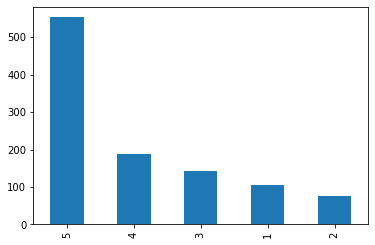

In [58]:
freq_data['Score'].value_counts().plot(kind='bar')

In [59]:
freq_data['Score'].value_counts()/len(freq_data)*100

5    51.973684
4    17.575188
3    13.533835
1     9.774436
2     7.142857
Name: Score, dtype: float64

In [60]:
not_freq_data['Score'].value_counts()/len(not_freq_data)*100

5    39.177770
1    25.219037
3    12.391778
4    11.969257
2    11.242159
Name: Score, dtype: float64

<AxesSubplot:>

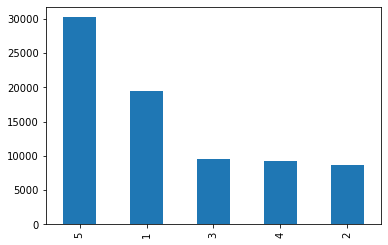

In [61]:
not_freq_data['Score'].value_counts().plot(kind='bar')

In [62]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'viewer_type'],
      dtype='object')

PERFORMING SENTIMENT ANALYSIS ON DATA

In [63]:
data['Text']

14        The Strawberry Twizzlers are my guilty pleasur...
15        My daughter loves twizzlers and this shipment ...
26        The candy is just red , No flavor . Just  plan...
27        I was so glad Amazon carried these batteries. ...
31        This offer is a great price and a great taste,...
                                ...                        
568384    Tasteless, bland, insipid - how many synonyms ...
568405    The product arrived pretty quickly and was eas...
568417    This is the best brand of Mango Chutney that I...
568435    It is mostly broth, with the advertised 3/4 cu...
568439    We need this for a recipe my wife is intereste...
Name: Text, Length: 78220, dtype: object

In [64]:
data[['UserId', 'ProductId' , 'Text']]

,UserId,ProductId,Text
14,A2MUGFV2TDQ47K,B001GVISJM,The Strawberry Twizzlers are my guilty pleasur...
15,A1CZX3CP8IKQIJ,B001GVISJM,My daughter loves twizzlers and this shipment ...
26,A3RXAU2N8KV45G,B001GVISJM,"The candy is just red , No flavor . Just plan..."
27,AAAS38B98HMIK,B001GVISJM,I was so glad Amazon carried these batteries. ...
31,A31OQO709M20Y7,B003F6UO7K,"This offer is a great price and a great taste,..."
...,...,...,...
568384,A8T6W1M15FM75,B000H28ABW,"Tasteless, bland, insipid - how many synonyms ..."
568405,A2ZKNGL20FBK2I,B000P56I7Y,The product arrived pretty quickly and was eas...
568417,A1SOL9F0I9D3A4,B0000D16IP,This is the best brand of Mango Chutney that I...
568435,A2PSB4WQHH46HN,B003XUL27E,"It is mostly broth, with the advertised 3/4 cu..."


In [65]:
def calculate_length(text):
    return len(text.split(' '))

In [66]:
data ['Text_Length'] = data['Text'].apply(calculate_length)

In [67]:
not_freq_data = data[data['viewer_type']=="Not Frequent"]
freq_data = data[data['viewer_type']=="Frequent"]

In [68]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_Length
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,2009-12-29,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,Not Frequent,24
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent,22
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,2012-03-16,Great Bargain for the Price,I was so glad Amazon carried these batteries. ...,Not Frequent,38
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,5,2010-10-29,THIS IS MY TASTE...,"This offer is a great price and a great taste,...",Not Frequent,18
47,48,B001EO5QW8,A26AY1TFK8BQXQ,"kbogo ""shoelover""",1,2,3,2008-01-12,Mushy,"The flavors are good. However, I do not see a...",Not Frequent,23
...,...,...,...,...,...,...,...,...,...,...,...,...
568384,568385,B000H28ABW,A8T6W1M15FM75,"CA-SK ""CLA""",0,3,2,2009-10-11,Bland Taco Seasoning,"Tasteless, bland, insipid - how many synonyms ...",Not Frequent,30
568405,568406,B000P56I7Y,A2ZKNGL20FBK2I,Shatzi Crabtree,3,5,5,2010-05-27,Arrived Fine,The product arrived pretty quickly and was eas...,Not Frequent,29
568417,568418,B0000D16IP,A1SOL9F0I9D3A4,William M. Jacobs,2,4,4,2009-11-11,Great,This is the best brand of Mango Chutney that I...,Not Frequent,17
568435,568436,B003XUL27E,A2PSB4WQHH46HN,carlyowu,0,2,2,2010-09-29,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu...",Not Frequent,60


Text(0.5, 0, 'Freq of not-freq reviewers')

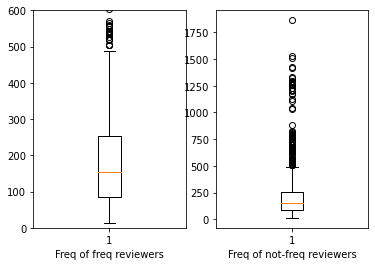

In [69]:
fig = plt.figure()

ax1= fig.add_subplot(121)
ax1.boxplot(freq_data['Text_Length'])
ax1.set_xlabel('Freq of freq reviewers')
ax1.set_ylim(0,600)

ax2= fig.add_subplot(122)
ax2.boxplot(freq_data['Text_Length'])
ax2.set_xlabel('Freq of not-freq reviewers')

In [70]:
!pip install textblob

In [71]:
from textblob import TextBlob

In [72]:
data['Summary']

14                    Strawberry Twizzlers - Yummy
15        Lots of twizzlers, just what you expect.
26                                 Nasty No flavor
27                     Great Bargain for the Price
31                             THIS IS MY TASTE...
                            ...                   
568384                        Bland Taco Seasoning
568405                                Arrived Fine
568417                                       Great
568435                     Where's the tortellini?
568439                                        a-ok
Name: Summary, Length: 78220, dtype: object

In [73]:
TextBlob('Great Bargain for the Price').sentiment.polarity

0.8

In [74]:
TextBlob('Nasty No flavor').sentiment.polarity

-1.0

In [75]:
data.shape

(78220, 12)

In [76]:
sample = data[0:50000]

In [77]:
polarity = []

for text in sample['Summary']:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [78]:
len(polarity)

50000

In [79]:
sample['polarity'] = polarity

In [80]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,Text_Length,polarity
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Frequent,22,0.0
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,2009-12-29,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,Not Frequent,24,0.0
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent,22,-1.0
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,2012-03-16,Great Bargain for the Price,I was so glad Amazon carried these batteries. ...,Not Frequent,38,0.8
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,5,2010-10-29,THIS IS MY TASTE...,"This offer is a great price and a great taste,...",Not Frequent,18,0.0


In [81]:
sample_negative = sample[sample['polarity']<0]
sample_positive = sample[sample['polarity']>0]

In [82]:
from collections import Counter

In [83]:
Counter(sample_negative['Summary']).most_common(10)

[('Disappointed', 86),
 ('Disappointing', 49),
 ('Awful', 36),
 ('Horrible', 35),
 ('disappointed', 35),
 ('Not what I expected', 34),
 ('Disgusting', 27),
 ('Terrible', 27),
 ('Not good', 21),
 ('terrible', 21)]

In [84]:
Counter(sample_positive['Summary']).most_common(10)

[('Delicious', 118),
 ('Delicious!', 109),
 ('Excellent', 58),
 ('Great Product', 58),
 ('Great product', 51),
 ('Great', 45),
 ('Great!', 36),
 ('Excellent!', 33),
 ('Good stuff', 33),
 ('Love it!', 33)]

# END